In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from xgboost import XGBClassifier
from xgboost import plot_importance  
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Selection model
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,StratifiedKFold 

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics import roc_curve, auc

# %% Function for plotting ROC_AUC curve

def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [4]:
def evalua(y_pred,y_test):
    
    # Evaluate of predictions 
    accuracy = accuracy_score(y_test, y_pred) 
    roc = roc_auc_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    # Data test results
    print('Evaluation of predictions: \n')
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Area ROC: %.2f%%" % (roc * 100.0))
    print("F1 Score: %.2f%%" % (f1 * 100.0))

In [5]:
original = pd.read_excel('../input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx',"Data")

## Features are detailed below:

* Age: Customer's age
* Experience: Number of years of professional experience
* Income: Annual income of the customer
* ZIPCode: Home Address ZIP code
* Family: Family size of the customer
* CCAvg: Average spending on credit cards per month
* Education: 1: Undergrade; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* CreditCard: Does the customer uses a credit card issued by UniversalBank?
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?

In [6]:
original.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df = original
df.drop(['ID'],axis = 1, inplace = True)
x = df.drop(['Personal Loan'], axis = 1)
y = df['Personal Loan']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [10]:
# Grid Search 
model = XGBClassifier() 

learning_rate = [0.01, 0.1, 0.2] 
max_depth=[6]
booster=['gbtree']
n_estimators=[100]
nthread=[6]
min_child_weight=[1,5,10,20,30]

param_grid = dict(min_child_weight=min_child_weight,nthread=nthread,learning_rate=learning_rate,max_depth=max_depth,booster=booster,n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7) 
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs = 10, cv=kfold) 
grid_result = grid_search.fit(x_train, y_train)

In [11]:
#Adaboost
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
# Train the AdaBoost classifier
adaboost.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [12]:
# Create the Gradient Boost classifier
gradientboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
# Train the Gradient Boost classifier
gradientboost.fit(x_train, y_train)

GradientBoostingClassifier()

In [13]:
# Summarize results   
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']

Best: 0.984776 using {'booster': 'gbtree', 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'nthread': 6}


Evaluation of predictions: 

Accuracy: 98.55%
Area ROC: 95.15%
F1 Score: 91.67%


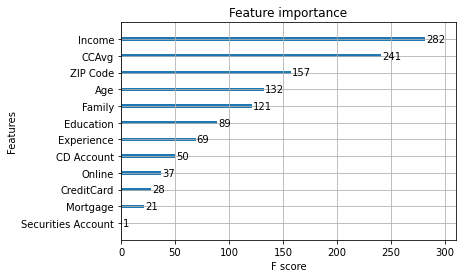

In [14]:
# Evaluate of predictions 
model_best = grid_search.best_estimator_
y_pred=model_best.predict(x_test)
evalua(y_pred,y_test)

# Plot feature importance 
plot_importance(model_best) 
plt.show()

In [15]:
#Adaboost
#adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
# Train the AdaBoost classifier
#adaboost.fit(x_train, y_train)

In [16]:
y_pred1=adaboost.predict(x_test)
evalua(y_pred1,y_test)

Evaluation of predictions: 

Accuracy: 96.42%
Area ROC: 83.39%
F1 Score: 76.86%


In [17]:
# Create the Gradient Boost classifier
#gradientboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
# Train the Gradient Boost classifier
#gradientboost.fit(x_train, y_train)

In [18]:
y_pred2=gradientboost.predict(x_test)
evalua(y_pred2,y_test)

Evaluation of predictions: 

Accuracy: 98.42%
Area ROC: 94.77%
F1 Score: 90.97%


In [19]:
# Classification report xgboost
print('Classification Report:\n')
print(classification_report(y_test, y_pred),'\n')

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1505
           1       0.92      0.91      0.92       145

    accuracy                           0.99      1650
   macro avg       0.96      0.95      0.95      1650
weighted avg       0.99      0.99      0.99      1650
 



In [20]:
# Classification report for adaboost
print('Classification Report:\n')
print(classification_report(y_test, y_pred1),'\n')

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1505
           1       0.89      0.68      0.77       145

    accuracy                           0.96      1650
   macro avg       0.93      0.83      0.87      1650
weighted avg       0.96      0.96      0.96      1650
 



In [21]:
# Classification report for gradientboost
print('Classification Report:\n')
print(classification_report(y_test, y_pred2),'\n')

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1505
           1       0.92      0.90      0.91       145

    accuracy                           0.98      1650
   macro avg       0.95      0.95      0.95      1650
weighted avg       0.98      0.98      0.98      1650
 



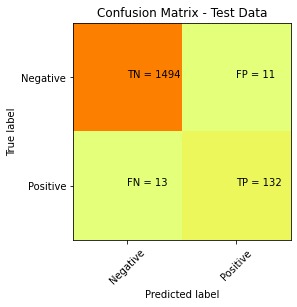

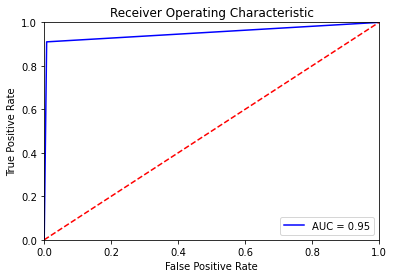

In [22]:
# Confusion matrix
cm =confusion_matrix(y_test,y_pred)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

plot_roc_auc(y_test, y_pred)

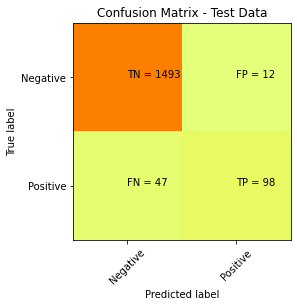

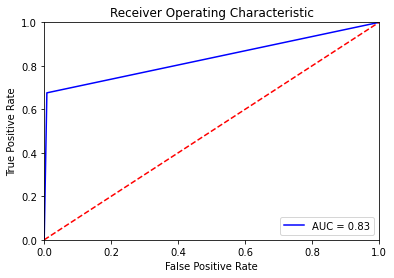

In [23]:
# Confusion matrix
cm =confusion_matrix(y_test,y_pred1)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

plot_roc_auc(y_test, y_pred1)

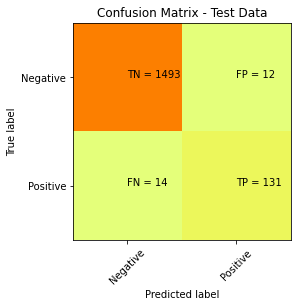

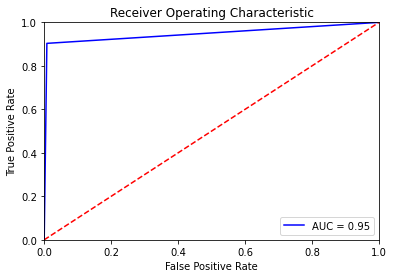

In [24]:
# Confusion matrix
cm =confusion_matrix(y_test,y_pred2)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


plot_roc_auc(y_test, y_pred2)